In [1]:
# Import modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime as dt

import re

import requests
from bs4 import BeautifulSoup as soup

import pyxlsb
from pyxlsb import convert_date

#%qtconsole

In [2]:
# Define local directories
master_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\'
data_raw_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\raw\\'
data_interim_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\interim\\'
data_external_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\external\\'

# Define eia API and URL
api_key_eia = '231fd0a62041a63a05da2716cd3a73d6'
url_eia = 'http://api.eia.gov/series/?api_key='+api_key_eia+'&out=json&series_id='

### Price and futures data.
Available daily. 

In [3]:
# Create new data frame with wti_spot (DAILY)
url_wti_spot = url_eia+'PET.RWTC.D'
label = 'wti_spot'

date_now = dt.now().date()

# Get request from URL, convert to json
r = requests.get(url_wti_spot)
wti_spot_json = r.json()

# Load json data and convert date to datetime
df = pd.DataFrame(list(wti_spot_json['series'][0]['data']),columns=['date',label])
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

# Load data from time frame
df = df[(df.date > '2009-11-15') & (df.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df = df.set_index('date').resample('W-FRI').mean()
df = df.reset_index() 

In [4]:
# Download brent_spot and merge with df (DAILY)
url_trans = url_eia+'PET.RBRTE.D'
label = 'brent_spot'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('W-FRI').mean()
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans, how='outer').sort_values('date', ascending=False)

In [5]:
# Download wti_fut_1 and merge with df (DAILY)
url_trans = url_eia + 'PET.RCLC1.D'
label = 'wti_fut_1'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('W-FRI').mean()
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans, how='outer').sort_values('date', ascending=False)

In [6]:
# Download wti_fut_2 and merge with df (DAILY)
url_trans = url_eia + 'PET.RCLC2.D'
label = 'wti_fut_2'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('W-FRI').mean()
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans, how='outer').sort_values('date', ascending=False)

In [7]:
# Download wti_fut_3 and merge with df (DAILY)
url_trans = url_eia + 'PET.RCLC3.D'
label = 'wti_fut_3'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('W-FRI').mean()
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans, how='outer').sort_values('date', ascending=False)

In [8]:
# Download wti_fut_4 and merge with df (DAILY)
url_trans = url_eia + 'PET.RCLC4.D'
label = 'wti_fut_4'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('W-FRI').mean()
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans, how='outer').sort_values('date', ascending=False)

### USA import, storage,and production data.
Available weekly. 

In [9]:
# Download usa_net_imp and merge with df (WEEKLY, kbpd)
url_trans = url_eia + 'PET.WCRNTUS2.W'
label = 'usa_net_import'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Convert units from kbpd to Mbpd
df_eia_trans[label] = df_eia_trans[label].div(1000)

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [10]:
# Download usa_stocks_all and merge with df (WEEKLY, kb)
url_trans = url_eia + 'PET.WCRSTUS1.W'
label = 'usa_stocks_all'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Convert units from kb to Mb
df_eia_trans[label] = df_eia_trans[label].div(1000)

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [11]:
# Download usa_stocks_spr and merge with df (WEEKLY, kb)
url_trans = url_eia + 'PET.WCSSTUS1.W'
label = 'usa_stocks_spr'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Convert units from kb to Mb
df_eia_trans[label] = df_eia_trans[label].div(1000)

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [12]:
# Download usa_prod and merge with df (WEEKLY kbpd)
url_trans = url_eia + 'PET.W_EPC0_FPF_R48_MBBLD.W'
label = 'usa_l48_prod'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m-%d')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Convert units from kbpd to Mbpd
df_eia_trans[label] = df_eia_trans[label].div(1000)

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

### International & OPEC production, consumption data.
Available **monthly** only. 

Major assumption that the change is linear between months.

In [13]:
# Download opec_tot_prod and merge with df (MONTHLY, Mbpd)
url_trans = url_eia + 'STEO.PAPR_OPEC.M'
label = 'opec_tot_prod'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to YYYY-MM-DD, then to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = df_eia_trans.date + '01'
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('D').interpolate().asfreq('W-FRI')
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [14]:
# Download opec_crud_prod and merge with df (MONTHLY, Mbpd)
url_trans = url_eia + 'STEO.COPR_OPEC.M'
label = 'opec_crud_prod'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to YYYY-MM-DD, then to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = df_eia_trans.date + '01'
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('D').interpolate().asfreq('W-FRI')
#df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
#df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [15]:
# Download opec_crud_capac and merge with df (MONTHLY, Mbpd)
url_trans = url_eia + 'STEO.COPC_OPEC.M'
label = 'opec_crud_capac'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to YYYY-MM-DD, then to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = df_eia_trans.date + '01'
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('D').interpolate().asfreq('W-FRI')
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [16]:
# Download opec_surp_capac and merge with df (MONTHLY, Mbpd)
url_trans = url_eia + 'STEO.COPS_OPEC.M'
label = 'opec_surp_capac'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to YYYY-MM-DD, then to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = df_eia_trans.date + '01'
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('D').interpolate().asfreq('W-FRI')
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [17]:
# Download non-opec_tot_prod and merge with df (MONTHLY)
url_trans = url_eia + 'STEO.PAPR_NONOPEC.M'
label = 'non-opec_tot_prod'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to YYYY-MM-DD, then to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = df_eia_trans.date + '01'
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('D').interpolate().asfreq('W-FRI')
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [18]:
# Download oecd_cons and merge with df (MONTHLY)
url_trans = url_eia + 'STEO.PATC_OECD.M'
label = 'oecd_cons'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to YYYY-MM-DD, then to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = df_eia_trans.date + '01'
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('D').interpolate().asfreq('W-FRI')
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [19]:
# Download non-oecd_cons and merge with df (MONTHLY)
url_trans = url_eia + 'STEO.PATC_NON_OECD.M'
label = 'non-oecd_cons'

# Get request from URL, convert to json
r = requests.get(url_trans)
json_trans = r.json()

# Load json data and convert date to YYYY-MM-DD, then to datetime
df_eia_trans = pd.DataFrame(list(json_trans['series'][0]['data']),columns=['date',label])
df_eia_trans.date = df_eia_trans.date + '01'
df_eia_trans.date = pd.to_datetime(df_eia_trans.date, format='%Y-%m')

# Load data from time frame
df_eia_trans = df_eia_trans[(df_eia_trans.date > '2009-11-15') & (df_eia_trans.date < str(dt.now().date()))]

# Resample for weekly data - starting on Friday
df_eia_trans = df_eia_trans.set_index('date').resample('D').interpolate().asfreq('W-FRI')
df_eia_trans = df_eia_trans.reset_index()

# Merge data frames
df = df.merge(df_eia_trans,how='outer').sort_values('date',ascending=False)

In [20]:
# Add world_cons (non-oecd_cons + oecd_cons)
df['world_cons'] = df['non-oecd_cons'] + df['oecd_cons']

# Sort data by date ascending
df = df.sort_values(by=['date'],ascending=True)

df = df[(df.date >= '2010-01-01') & (df.date <= dt.now().date().strftime('%Y-%m')+'-01')]
df = df.reset_index(drop=True)

In [21]:
# Save df_dropped to csv
df.to_csv(data_interim_dir+'eia_data_weekly.csv',index=False)

In [22]:
# Brief EDA
df_world = df[['date','world_cons','wti_spot']]
df_rec = df_world[(df_world.date > '2020-01-01') & (df_world.date < '2020-07-01')]
df_rec = df_rec.set_index('date')

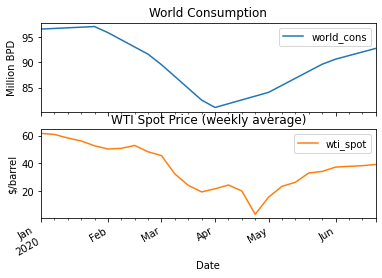

In [23]:
axes = df_rec.loc[:,['world_cons','wti_spot']].plot(subplots=True, sharex=True)
axes[0].set(title='World Consumption', ylabel='Million BPD')
axes[1].set(title='WTI Spot Price (weekly average)',xlabel='Date',ylabel='$/barrel')
plt.show()